# Prediction using Unsupervised ML

## Jay Patel

### Task : From 'iris' dataset , predict the optimum number of clusters and represent it visually.

In [1]:
# Import the neccesary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset.

df=sns.load_dataset('iris')

In [3]:
# Display the few rows of dataset.

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Display the shape of the dataset.

print(df.shape)

(150, 5)


In [5]:
# Split into independent variable.

X = df.iloc[:, :-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### To find optimal number of clusters.

Find the within-cluster sum of square.

In [6]:
# Import necessary library.

from sklearn.cluster import KMeans

In [7]:
# Calculate within-cluster sum of square.

wcss = []

for k in range(1,11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++')  #Initialize KMeans algorithm.
    kmeans_model.fit(X)  #Fit the DataFrame.
    wcss.append(kmeans_model.inertia_)  #kmeans_model.inertia_ calculates wcss.

In [8]:
# Display wcss.

wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.28208202543247,
 52.99335416666667,
 41.87057051282052,
 34.782204184704185,
 30.378860962566847,
 28.271721728563833,
 27.23598196248195]

### Plot elbow graph.

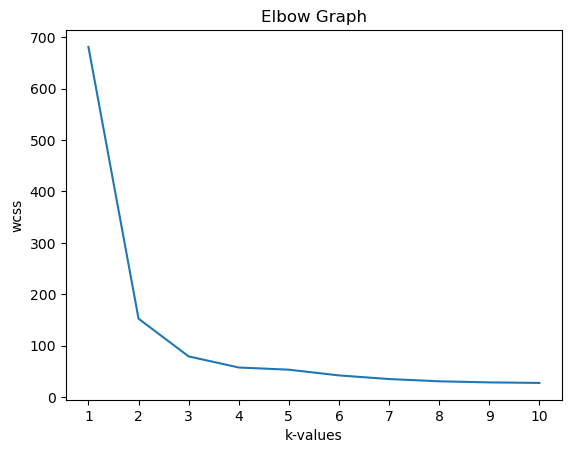

In [9]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("k-values")
plt.ylabel("wcss")
plt.title("Elbow Graph")
plt.show()

### Observation :
From the above elbow graph we can say that number of cluster should be '3'.

In [10]:
# Build the final model.

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [11]:
# Fit the Model.

kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [12]:
# Predict the labels.

cluster_labels = kmeans.predict(X)

# Display labels.

cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Plot clusters.

To plot cluster first we have to reduce dimension 4 to 2.

In [13]:
# Import library for dimensionality reduction.

from sklearn.decomposition import PCA

In [14]:
# Initialize the library.

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

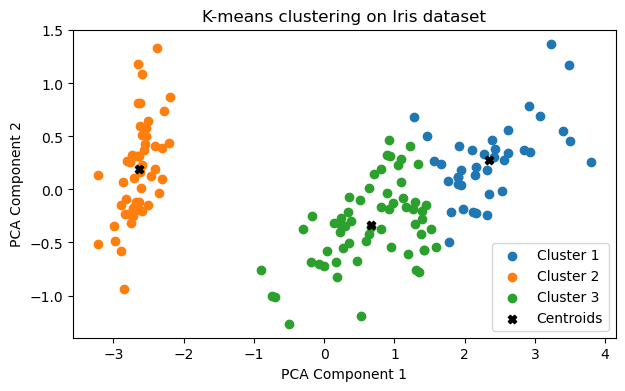

In [15]:
# Plotting the clusters

plt.figure(figsize=(7, 4))
for i in range(3):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i+1}')
    
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', label='Centroids')

plt.title("K-means clustering on Iris dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()